In [21]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt 

In [28]:
# Cargamos el Dataframe
df = pd.read_csv('train.csv')

#Eliminamos los outlayers
df = df.drop(df[df['x']>120].index)
df = df.head(100)
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [29]:
mode = df.describe()
print(mode)

                x           y
count  100.000000  100.000000
mean    41.750000   41.766780
std     27.529369   27.431911
min      0.000000   -1.286311
25%     19.000000   21.857613
50%     39.000000   39.427040
75%     60.000000   61.794065
max     95.000000   94.684883


In [30]:
# Reemplazamos los nulos de cada columna con la media respectivamente
df = df.fillna({'x':41})
df = df.fillna({'y': 41})

In [31]:
# Definimos quién es X y quién y
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [33]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.987639846803281


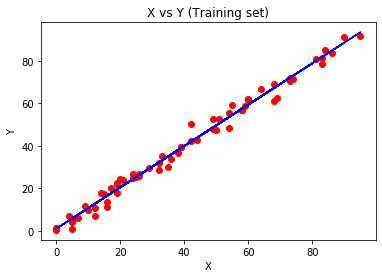

In [35]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('X vs Y (Training set)') 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

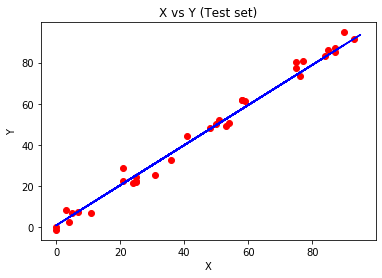

In [36]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('X vs Y (Test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [38]:
kf = KFold(n_splits=4, shuffle=True, random_state=456)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 5 volúmenes: 0.9857767369105583
